q1: return the first 5 rows of the database

In [1]:
import pandas as pd
import sqlite3
conn = sqlite3.connect("factbook.db")
q1 = "select * from facts limit 5"
results = pd.read_sql_query(q1,conn)
print(results)

   id code         name     area  area_land  area_water  population  \
0   1   af  Afghanistan   652230     652230           0    32564342   
1   2   al      Albania    28748      27398        1350     3029278   
2   3   ag      Algeria  2381741    2381741           0    39542166   
3   4   an      Andorra      468        468           0       85580   
4   5   ao       Angola  1246700    1246700           0    19625353   

   population_growth  birth_rate  death_rate  migration_rate  
0               2.32       38.57       13.89            1.51  
1               0.30       12.92        6.58            3.30  
2               1.84       23.67        4.31            0.92  
3               0.12        8.13        6.96            0.00  
4               2.78       38.78       11.49            0.46  


q2: return the minimum and maximum of population and population grwoth

In [2]:
q2="select min(population), max(population), min(population_growth), max(population_growth) from facts"
print(pd.read_sql_query(q2,conn))

   min(population)  max(population)  min(population_growth)  \
0                0       7256490011                     0.0   

   max(population_growth)  
0                    4.02  


q3 & q4: return countries with minimum and maximum population

In [3]:
q3="select name from facts where population==(select min(population) from facts)"
q4="select name from facts where population==(select max(population) from facts)"
print("countries with a population of 0\n", pd.read_sql_query(q3,conn))
print("countries with a population of 7256490011\n",pd.read_sql_query(q4,conn))

countries with a population of 0
          name
0  Antarctica
countries with a population of 7256490011
     name
0  World


Nobody lived in Antarctica and the total population of the world was 7.2 billion.

population           1.367485e+09
population_growth    4.020000e+00
birth_rate           4.545000e+01
death_rate           1.489000e+01
dtype: float64


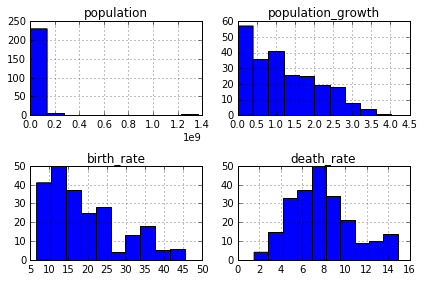

In [4]:
q5 = "select population,population_growth,birth_rate,death_rate from facts where name!='World' and name!='Antarctica'"
df = pd.read_sql_query(q5, conn)
print(df.apply(max))
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
cols = df.columns
for i in range(len(cols)):
    ax = fig.add_subplot(2,2, i+1)
    df[cols[i]].hist(ax=ax)
    plt.title(cols[i])
plt.tight_layout()
plt.show()




Which countries have the highest population density?

In [5]:
q6 = "select name, cast(population as float)/area_land density from facts order by density desc limit 1"
print(pd.read_sql_query(q6, conn))

    name       density
0  Macau  21168.964286


In [ ]:
Generate a histogram of population densities.

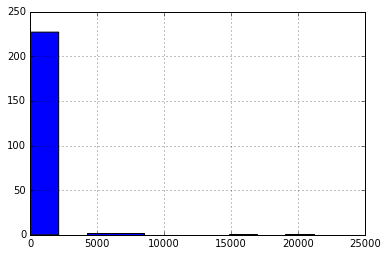

In [7]:
q6_r = "select name, cast(population as float)/area_land density from facts"
population_density = pd.read_sql_query(q6_r, conn)
population_density["density"].hist()

Which countries have the highest ratios of water to land?

In [8]:
q7 = "select name, cast(area_water as float)/area_land water_to_land from facts order by water_to_land desc limit 1"
print(pd.read_sql_query(q7, conn))

                             name  water_to_land
0  British Indian Ocean Territory     905.666667


Which countries have more water than land
q7_r = "select name, cast(area_water as float)/area_land water_to_land from facts where water_to_land > 0.5
print(pd.read_sql_query(q7_r, conn))

In [9]:
q7_r = "select name, cast(area_water as float)/area_land water_to_land from facts where water_to_land > 0.5" 
print(pd.read_sql_query(q7_r, conn))

                             name  water_to_land
0  British Indian Ocean Territory     905.666667
1                     Puerto Rico       0.554791
2                  Virgin Islands       4.520231
